# Airbnb Activity Investigation 

In [1]:
# Import All needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [2]:
# Import data for Seattle and Boston
df_Seattle = pd.read_csv('listings_Seattle.csv')
#df_Boston = pd.read_csv('listings_Boston.csv')

## Seattle Dataset Overview

In [3]:
df_Seattle

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [4]:
print('Max nights unique values count: ',df_Seattle.maximum_nights.nunique())
print('Max nights unique values count: ',df_Seattle.minimum_nights.nunique())
# Should be catigorical when using ML 

Max nights unique values count:  68
Max nights unique values count:  22


In [5]:
# Show Seattle dataset columns details
df_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
df_Seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
# Check repeated ID(s)
df_Seattle.id.nunique() == df_Seattle.shape[0]
#-- No repeated ID

True

In [8]:
# Based on data review, the columns in the list will be dropped:
to_drop_cols = ['id','last_scraped','listing_url','scrape_id','name','summary','space','neighborhood_overview','notes','thumbnail_url','description','experiences_offered','neighbourhood','latitude','longitude','host_location','host_acceptance_rate','host_acceptance_rate','host_total_listings_count','calendar_last_scraped','calendar_updated','host_response_rate',
  'medium_url','picture_url','xl_picture_url','host_id','host_url','host_name','host_about','host_thumbnail_url','host_neighbourhood','cleaning_fee','reviews_per_month',
  'host_picture_url','host_listings_count','host_verifications','host_has_profile_pic','street','neighbourhood','neighbourhood_group_cleansed', 'city', 'zipcode','state','market','smart_location','country_code','country','is_location_exact',
  'amenities', 'square_feet','weekly_price','monthly_price','security_deposit','has_availability','availability_30','availability_60','availability_90','first_review','last_review','license','jurisdiction_names','calculated_host_listings_count']

In [9]:
df_Seattle.drop(columns=to_drop_cols,axis=1,inplace=True)

In [10]:
df_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transit                           2884 non-null   object 
 1   host_since                        3816 non-null   object 
 2   host_response_time                3295 non-null   object 
 3   host_is_superhost                 3816 non-null   object 
 4   host_identity_verified            3816 non-null   object 
 5   neighbourhood_cleansed            3818 non-null   object 
 6   property_type                     3817 non-null   object 
 7   room_type                         3818 non-null   object 
 8   accommodates                      3818 non-null   int64  
 9   bathrooms                         3802 non-null   float64
 10  bedrooms                          3812 non-null   float64
 11  beds                              3817 non-null   float64
 12  bed_ty

In [11]:
df_Seattle.transit.nunique()
#This will be 1 (if provided) or 0 (if Null)

2574

In [12]:
df_Seattle.host_since = pd.to_datetime(df_Seattle.host_since)

# Change to date time type

<AxesSubplot:xlabel='host_response_time', ylabel='count'>

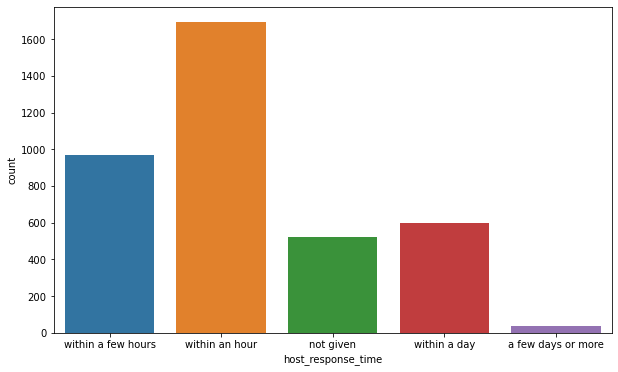

In [13]:
df_Seattle.host_response_time.fillna('not given', inplace=True)
plt.figure(figsize=(10,6))
sns.countplot(data=df_Seattle, x='host_response_time')

<AxesSubplot:xlabel='host_is_superhost', ylabel='count'>

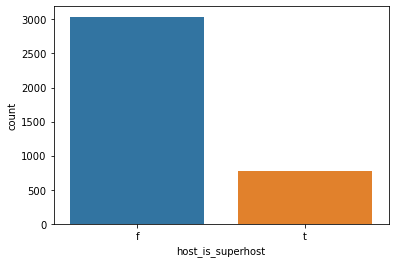

In [14]:
sns.countplot(data=df_Seattle, x='host_is_superhost')
# Most of the hosts in Seattle are not super .... and that makes sense

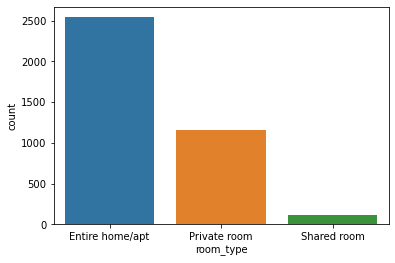

In [15]:
sns.countplot(data=df_Seattle, x='room_type')
plt.show()

## Boston Data Overview

In [16]:
df_Boston = pd.read_csv('listings_Boston.csv')
df_Boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [17]:
df_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [18]:
df_Boston.id.nunique() == df_Boston.shape[0]
# No repeated ID

True

In [19]:
df_Boston.drop(columns=to_drop_cols, axis=1,inplace=True)
# We can drop the same columns we droped from Seattle dataset to unify the work

**After Taking look on our data we will fill nulls and prepare features as follows:**

In [20]:
df_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   transit                           2884 non-null   object        
 1   host_since                        3816 non-null   datetime64[ns]
 2   host_response_time                3818 non-null   object        
 3   host_is_superhost                 3816 non-null   object        
 4   host_identity_verified            3816 non-null   object        
 5   neighbourhood_cleansed            3818 non-null   object        
 6   property_type                     3817 non-null   object        
 7   room_type                         3818 non-null   object        
 8   accommodates                      3818 non-null   int64         
 9   bathrooms                         3802 non-null   float64       
 10  bedrooms                          3812 non-null 

In [21]:
# Drop the 2 rows containg the hosts with unkmown joining date
df_Seattle.dropna(subset = ["host_since"], inplace=True)

In [22]:
df_Seattle.transit.fillna('NOT GIVEN',inplace=True)
mask = df_Seattle.transit != 'NOT GIVEN'
df_Seattle.loc[mask,'transit'] = 'GIVEN' 
df_Seattle.transit.value_counts()
# Filling nulls with `NOT GIVEN` and replace all strings with `GIVEN`

GIVEN        2883
NOT GIVEN     933
Name: transit, dtype: int64

In [23]:
df_Boston.host_since = pd.to_datetime(df_Boston.host_since)


In [24]:
df_Seattle.host_is_superhost.fillna('f')
df_Seattle.host_is_superhost.value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [25]:
imputer = SimpleImputer(strategy='most_frequent')
df_Seattle[df_Seattle.select_dtypes('object').columns] = imputer.fit_transform(df_Seattle[df_Seattle.select_dtypes('object').columns])
# All String (object) Columns with null values in the dataset suit imputing with mode (most frequent value)

In [26]:
df_Seattle.info()
# View info after filling nulls in string cloumns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   transit                           3816 non-null   object        
 1   host_since                        3816 non-null   datetime64[ns]
 2   host_response_time                3816 non-null   object        
 3   host_is_superhost                 3816 non-null   object        
 4   host_identity_verified            3816 non-null   object        
 5   neighbourhood_cleansed            3816 non-null   object        
 6   property_type                     3816 non-null   object        
 7   room_type                         3816 non-null   object        
 8   accommodates                      3816 non-null   int64         
 9   bathrooms                         3800 non-null   float64       
 10  bedrooms                          3810 non-null 

In [27]:
# As the beds, bedrooms, and bathrooms are descrete variables we can impute with most frequent
df_Seattle[['beds', 'bedrooms','bathrooms']] = imputer.fit_transform(df_Seattle[['beds', 'bedrooms','bathrooms']])

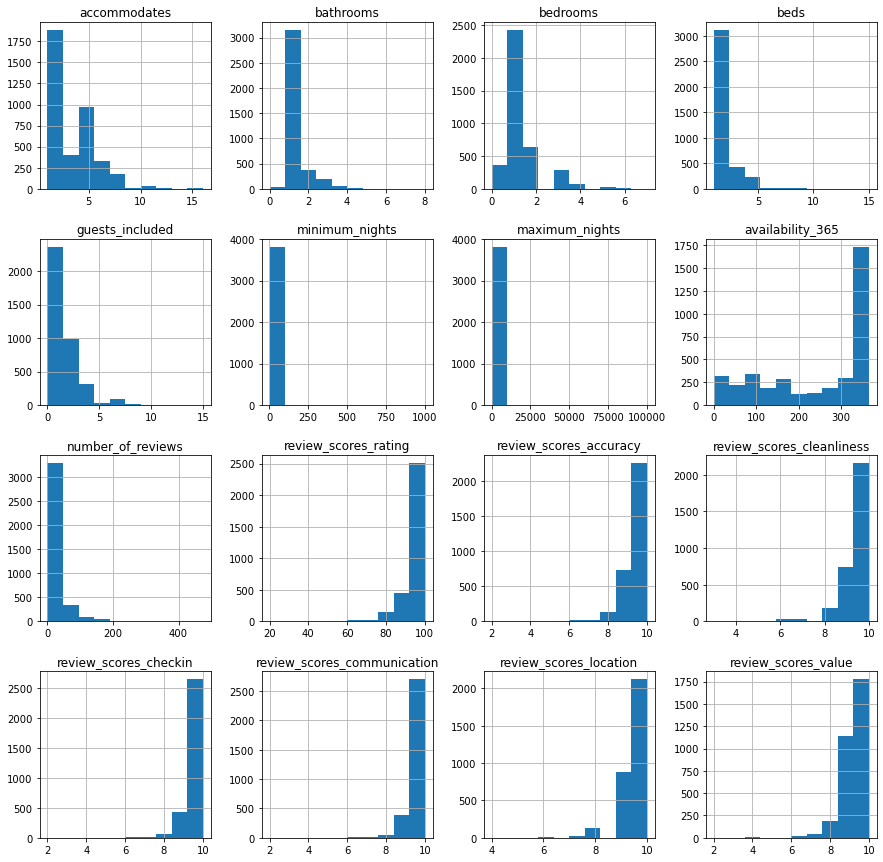

In [28]:
df_Seattle.hist(figsize=(15,15));

In [29]:
# AS all scores-related columns are Left skewed. We will impute with median as it is the best choice in this case
scoring_cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

median_imputer = SimpleImputer(strategy='median')

df_Seattle[scoring_cols] = median_imputer.fit_transform(df_Seattle[scoring_cols])

In [30]:
df_Seattle.isna().any().any()
# Finally we could replace nulls with appropriate values, according to each column's condition

False

In [31]:
df_Seattle.price.dtype
# Important: The price/night is given as string. We must change its type to be float so we can use it in our model and descriptives. 

dtype('O')

In [32]:
df_Seattle.price = df_Seattle.price.str.replace('["$",","]','').astype('float')

In [33]:
df_Seattle.price.describe()

count    3816.000000
mean      127.951782
std        90.250833
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

**Boston Data Preparation**

In [34]:
df_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   transit                           2295 non-null   object        
 1   access                            2096 non-null   object        
 2   interaction                       2031 non-null   object        
 3   house_rules                       2393 non-null   object        
 4   host_since                        3585 non-null   datetime64[ns]
 5   host_response_time                3114 non-null   object        
 6   host_is_superhost                 3585 non-null   object        
 7   host_identity_verified            3585 non-null   object        
 8   neighbourhood_cleansed            3585 non-null   object        
 9   property_type                     3582 non-null   object        
 10  room_type                         3585 non-null 

In [35]:
df_Boston.price = df_Boston.price.str.replace('["$",","]','').astype('float')
df_Boston.price.describe()
# Outlier presence is clear

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [36]:
df_Boston.transit.fillna('NOT GIVEN',inplace=True)
mask = df_Boston.transit != 'NOT GIVEN'
df_Boston.loc[mask,'transit'] = 'GIVEN' 
df_Boston.transit.value_counts()
# Filling nulls with `NOT GIVEN` and replace all strings with `GIVEN`

GIVEN        2295
NOT GIVEN    1290
Name: transit, dtype: int64

In [37]:
# view the unmatched columns remaining to drop
for col in df_Boston.columns:    
    try: 
        df_Seattle[col]
    except:
        print('Found unrelated column: ' + col)

Found unrelated column: access
Found unrelated column: interaction
Found unrelated column: house_rules


In [38]:
df_Boston.drop(columns=['access','interaction','house_rules'],axis=1,inplace=True)
#Drop access column as it is not mentioned in Seattle df

In [39]:
df_Boston[df_Boston.select_dtypes('object').columns] = imputer.fit_transform(df_Boston[df_Boston.select_dtypes('object').columns])
# All String (object) Columns with null values in the dataset suit imputing with mode (most frequent value)

In [40]:
# As the beds, bedrooms, and bathrooms are descrete variables we can impute with most frequent
df_Boston[['beds', 'bedrooms','bathrooms']] = imputer.fit_transform(df_Boston[['beds', 'bedrooms','bathrooms']])

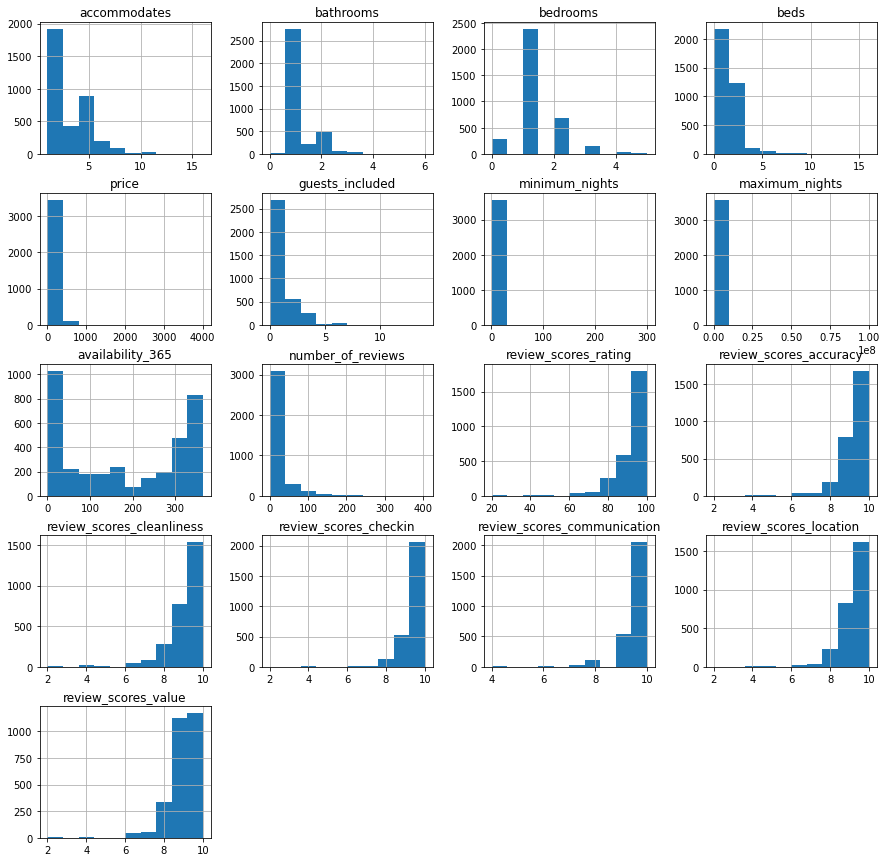

In [41]:
df_Boston.hist(figsize=(15,15));

In [42]:
# AS all scores-related columns are Left skewed. We will impute with median as it is the best choice in this case
scoring_cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

median_imputer = SimpleImputer(strategy='median')

df_Boston[scoring_cols] = median_imputer.fit_transform(df_Boston[scoring_cols])

In [43]:
df_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   transit                           3585 non-null   object        
 1   host_since                        3585 non-null   datetime64[ns]
 2   host_response_time                3585 non-null   object        
 3   host_is_superhost                 3585 non-null   object        
 4   host_identity_verified            3585 non-null   object        
 5   neighbourhood_cleansed            3585 non-null   object        
 6   property_type                     3585 non-null   object        
 7   room_type                         3585 non-null   object        
 8   accommodates                      3585 non-null   int64         
 9   bathrooms                         3585 non-null   float64       
 10  bedrooms                          3585 non-null 

In [44]:
df_Seattle.isna().all().any()
# Finally we could replace nulls with appropriate values, according to each column's condition

False

### Data Preparation Stage Summary:
- The dataset has different types columns, we should consider each column or each group to deal with as it needs.
  
- There are many columns that are dropable, which means they might have a lot of nulls, redundant information, confusing or unrelated info.
- By viewing the dataset, we could make a good picture about how data is distributed .
- As we have categorical, numerical and date-time columns we had to deal with them separetly, especially when filling nulls.
- Some columns nulls could be replaced by the most frequent value, median (for left/right skewed distribution), and dropping the ones that not affecting our analysis or can not be determined using the central limit values. 

## Q1. How To Be a Super Host? 

In [45]:
# First we need to replace `t` and `f` values in the `host_is_superhost` to be 1 or 0 so we can proceed in analysis easiar
df_Seattle.host_is_superhost.replace({'t': 1, 'f': 0},inplace=True)
df_Boston.host_is_superhost.replace({'t': 1, 'f': 0},inplace=True)

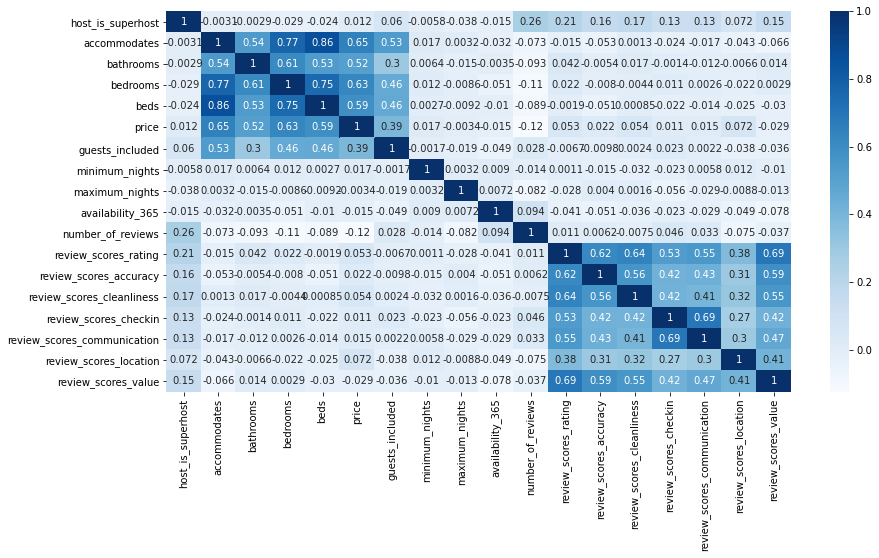

In [46]:
# Lets view the correlation matrix between the columns
plt.figure(figsize=(14,7))
sns.heatmap(df_Seattle.corr(), annot=True,cmap='Blues');
# reviews are most correlated with being suber host

Text(0.5, 1.0, 'Boston')

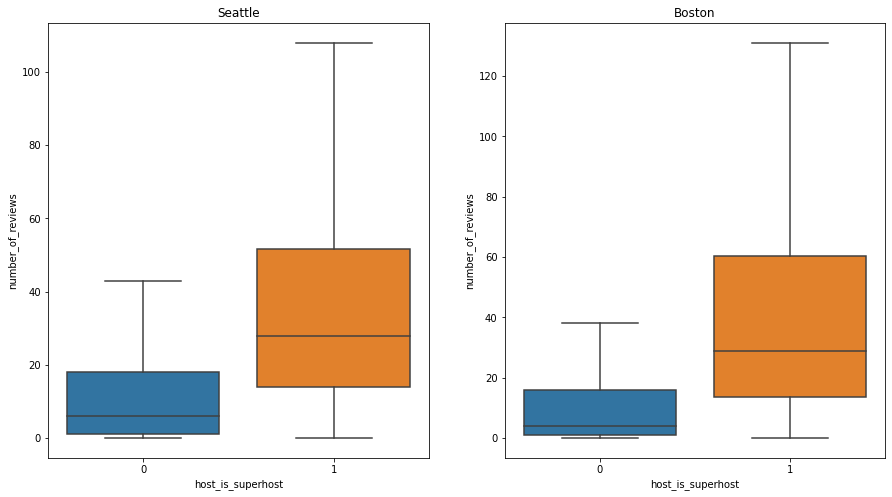

In [47]:

fig,ax = plt.subplots(1,2, figsize=(15,8))
sns.boxplot(x='host_is_superhost', y='number_of_reviews', data=df_Seattle,showfliers = False, ax=ax[0])
sns.boxplot(x='host_is_superhost', y='number_of_reviews', data=df_Boston,showfliers = False, ax=ax[1])
ax[0].set_title('Seattle')
ax[1].set_title('Boston')

# It is clear that the super hosts have more reviews in both cities

Text(0.5, 1.0, 'Boston')

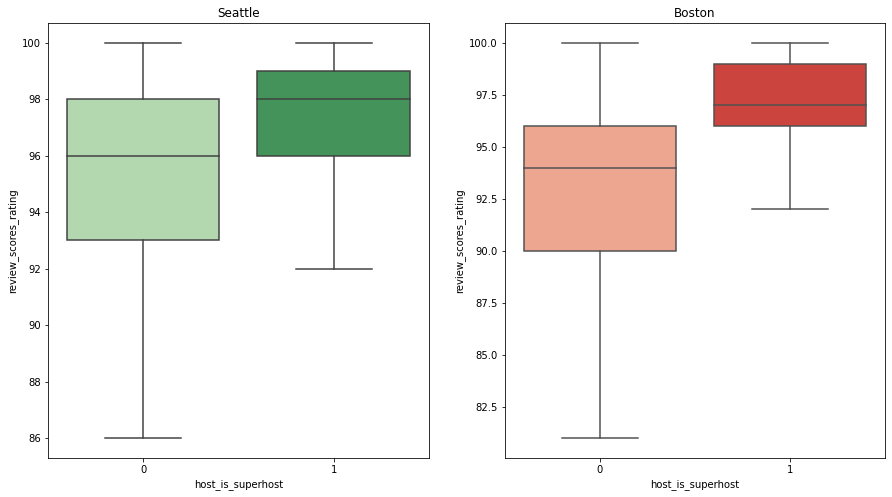

In [48]:
fig,ax = plt.subplots(1,2, figsize=(15,8))
sns.boxplot(x='host_is_superhost', y='review_scores_rating', data=df_Seattle,showfliers = False, ax=ax[0], palette='Greens')
sns.boxplot(x='host_is_superhost', y='review_scores_rating', data=df_Boston,showfliers = False, ax=ax[1], palette='Reds')
ax[0].set_title('Seattle')
ax[1].set_title('Boston')
# Super Hosts posses high rates compared to other  in both cities

In [49]:
df_Seattle.select_dtypes('object').columns.shape[0]
# number of catigorical columns in both cities

13

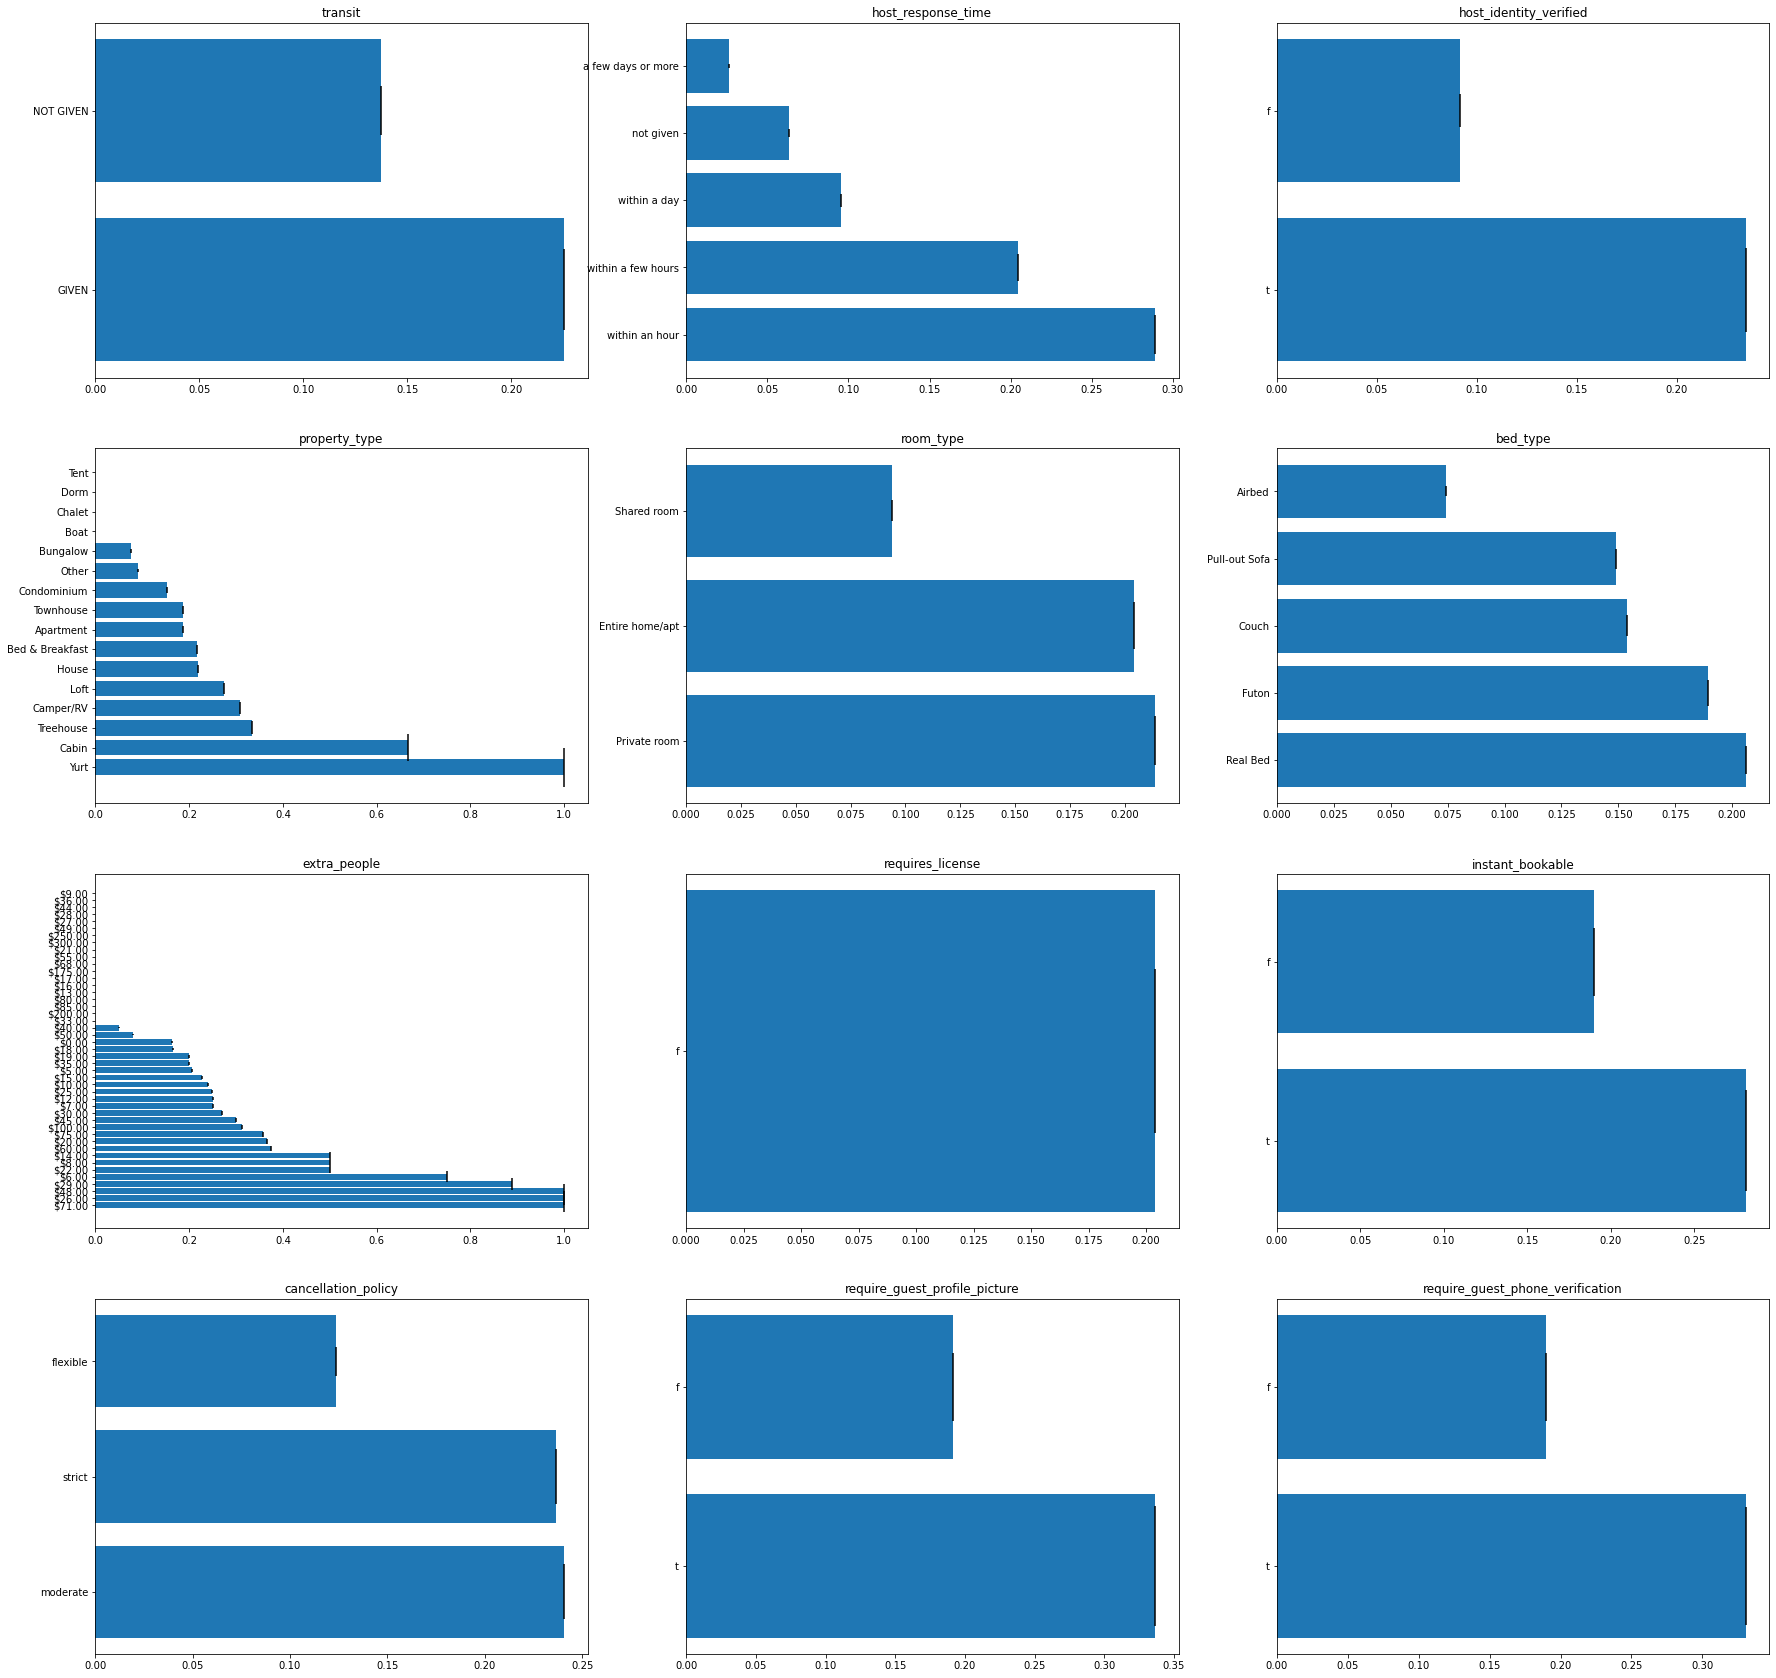

In [50]:
#We have 13 catigorical columns so we neen 4*4 figure to show their relations with being super host

catigorical_count = df_Seattle.select_dtypes('object').columns.shape[0]
catigorical_cols = df_Seattle.select_dtypes('object').columns.tolist()
catigorical_cols.remove('neighbourhood_cleansed') # Remove this column as we will plot it separatly

fig,ax = plt.subplots(4, 3, figsize=(30,30))
counter = 0
# Creat for loop to group by each catigorical colunm and plot proportions for super hosts in each catigory 

for i in range(4):
    for j in range(3):
        try:
            group = df_Seattle.groupby(catigorical_cols[counter]).mean().sort_values(by='host_is_superhost',ascending=False)
            ax[i,j].barh(y= group.index, width=group.host_is_superhost,  yerr= group['host_is_superhost'].values)
            ax[i,j].set_title(catigorical_cols[counter])       
            counter +=1 
        except:
            pass    

In [51]:
# We can see that some catigories have high proportion of super host as owning Yurt or Cabin property.
# Note that charging for extra peaple is main feature of super hosts (the columns should be numerical but it is ok for now) 

Text(0.5, 1.0, 'Neighbourhood')

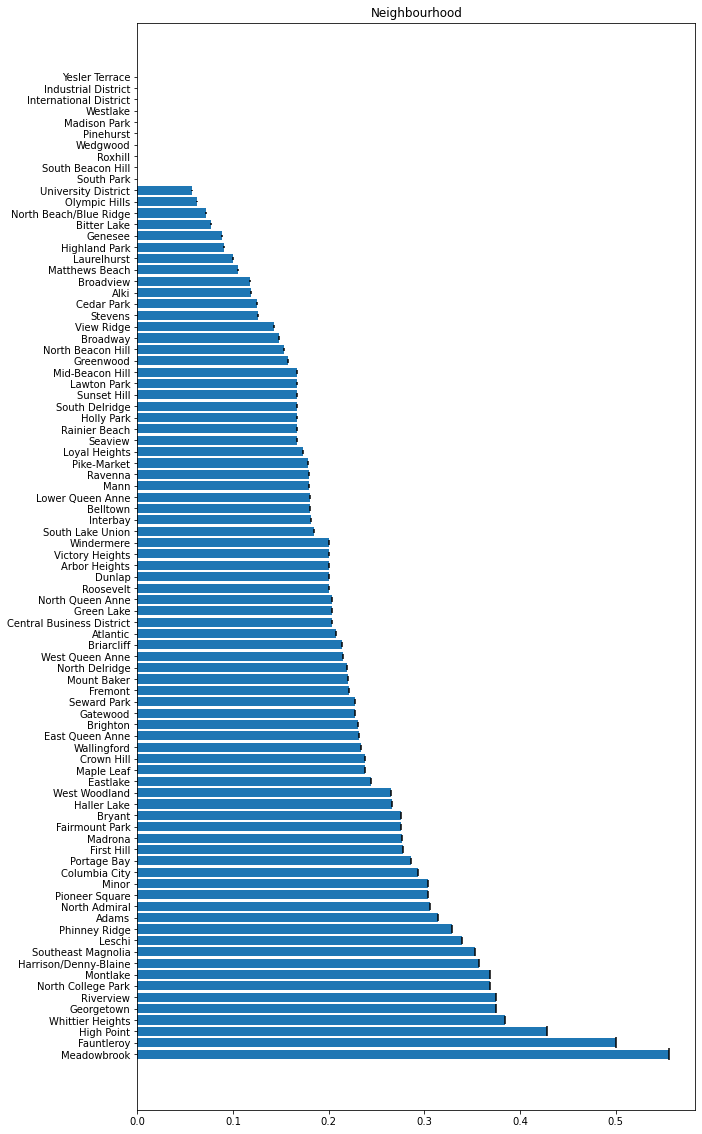

In [52]:
# plotting the Neighbourhood in separated plot where it has many catigories
neigboor_group = df_Seattle.groupby('neighbourhood_cleansed').mean().sort_values(by='host_is_superhost',ascending=False)
plt.figure(figsize=(10,20))
plt.barh(y= neigboor_group.index, width=neigboor_group.host_is_superhost,  yerr= neigboor_group['host_is_superhost'].values)
plt.title('Neighbourhood')

In [53]:
# Top 3 properties neighboors owned by super hosts are: Meadowbrook, Fauntleroy, Whittier Heights 

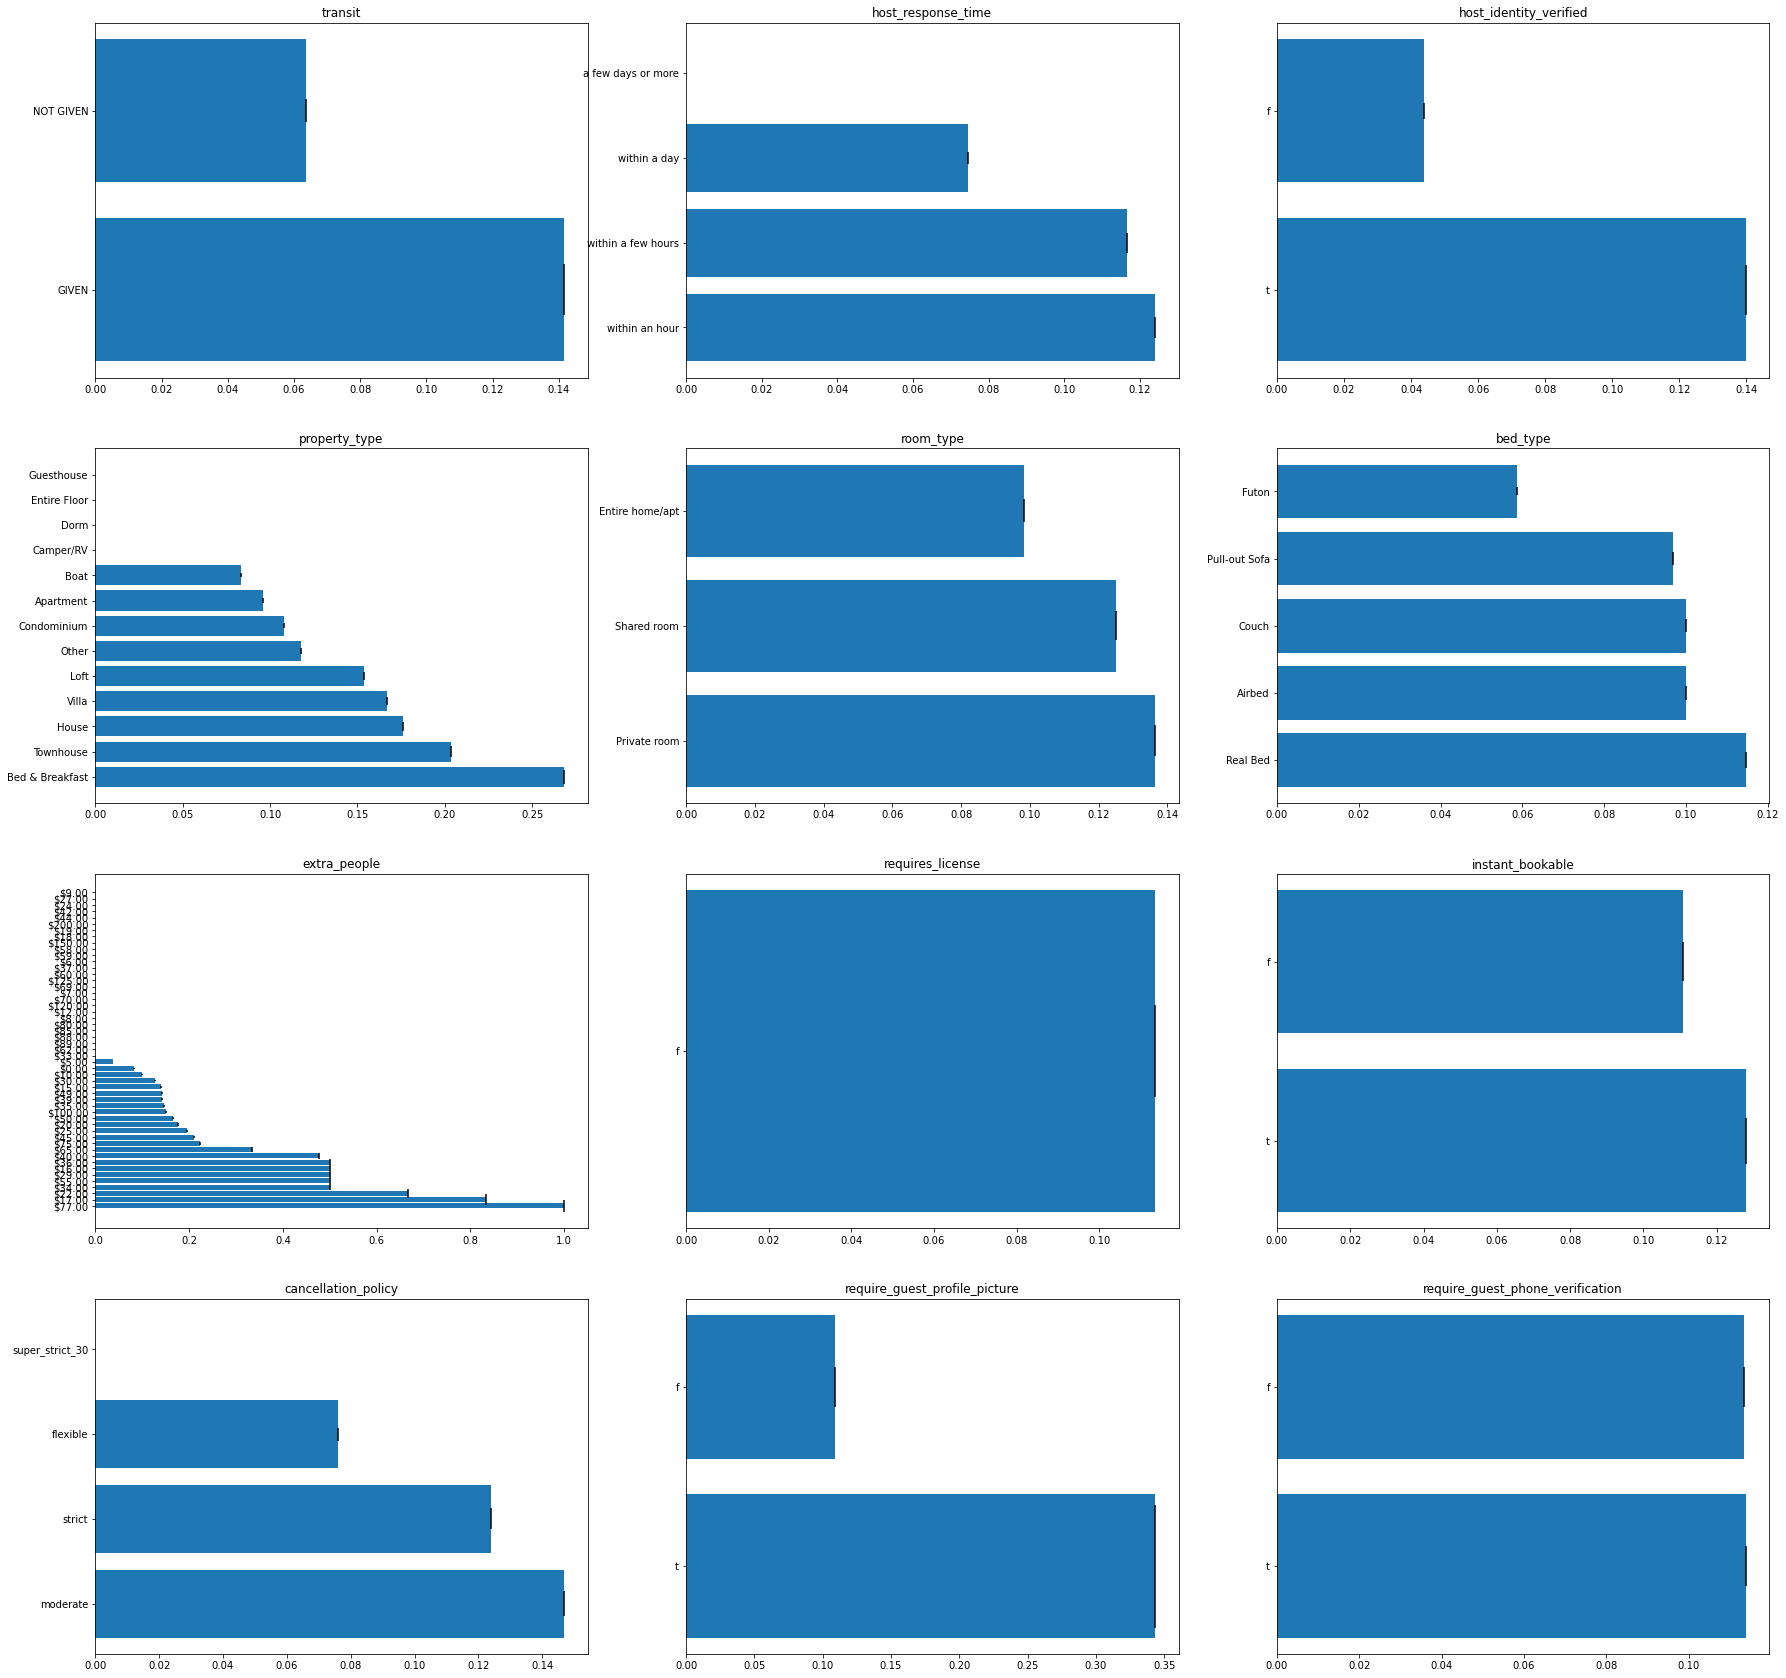

In [54]:
#We have 13 catigorical columns so we neen 4*4 figure to show their relations with being super host

catigorical_count = df_Boston.select_dtypes('object').columns.shape[0]
catigorical_cols = df_Boston.select_dtypes('object').columns.tolist()
catigorical_cols.remove('neighbourhood_cleansed') # Remove this column as we will plot it separatly
fig,ax = plt.subplots(4, 3, figsize=(30,30))
counter = 0
# Creat for loop to group by each catigorical colunm and plot proportions for super hosts in each catigory 

for i in range(4):
    for j in range(3):
            group = df_Boston.groupby(catigorical_cols[counter]).mean().sort_values(by='host_is_superhost',ascending=False)
            ax[i,j].barh(y= group.index, width=group.host_is_superhost,  yerr= group['host_is_superhost'].values)
            ax[i,j].set_title(catigorical_cols[counter])       
            counter +=1 
        

Text(0.5, 1.0, 'Neighbourhood')

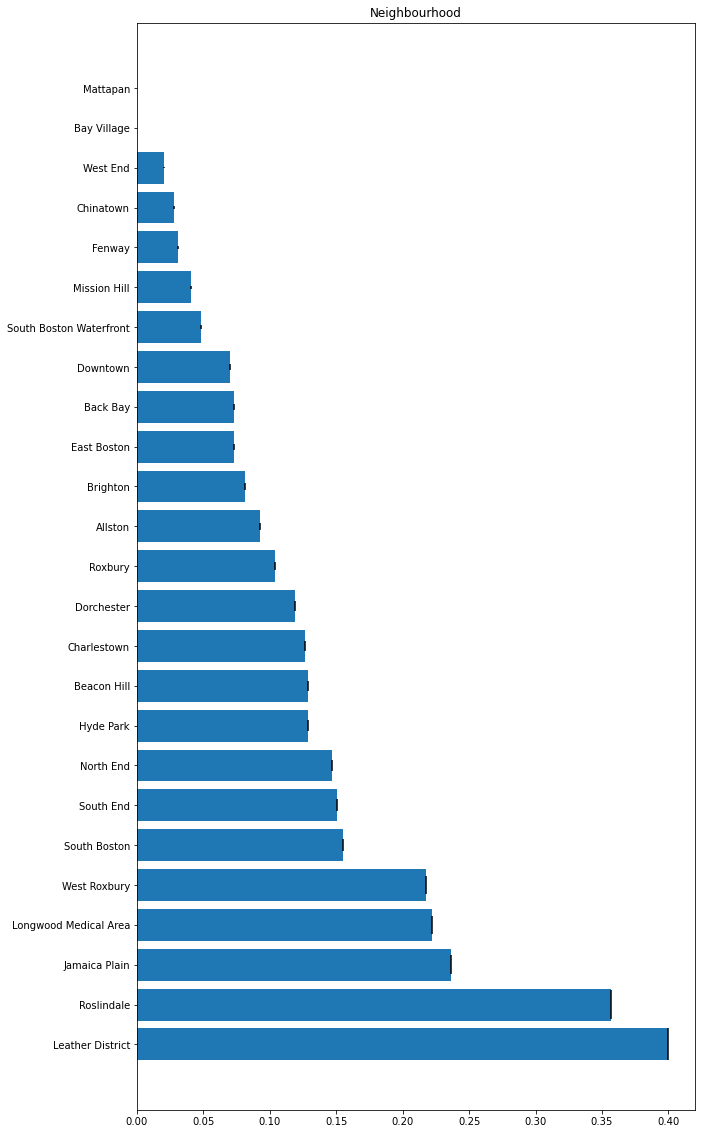

In [55]:
# plotting the Neighbourhood in separated plot where it has many catigories
neigboor_group = df_Boston.groupby('neighbourhood_cleansed').mean().sort_values(by='host_is_superhost',ascending=False)
plt.figure(figsize=(10,20))
plt.barh(y= neigboor_group.index, width=neigboor_group.host_is_superhost,  yerr= neigboor_group['host_is_superhost'].values)
plt.title('Neighbourhood')

In [56]:
# Leather District and Roslindale are the top 2 neighbourhoods with high proportion of superhosts

Text(0.5, 1.0, 'Price VS Being Superhost Boston')

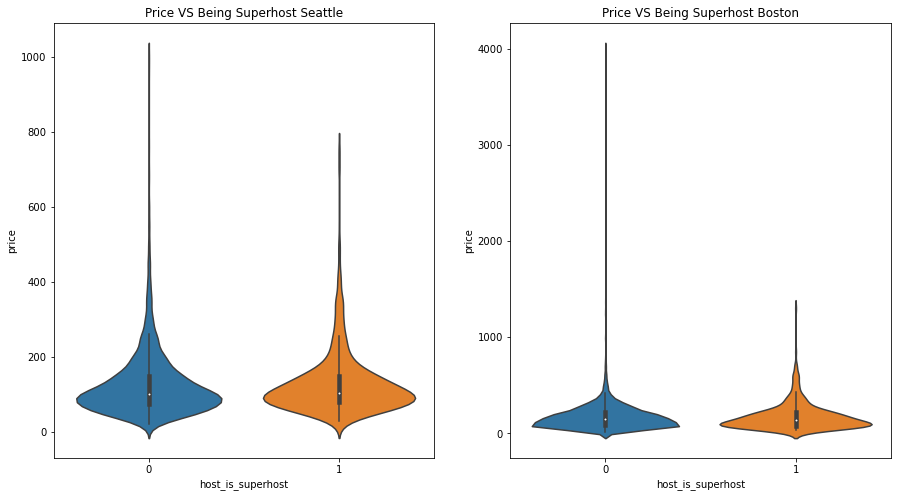

In [57]:

fig,ax = plt.subplots(1,2, figsize=(15,8))
sns.violinplot(x='host_is_superhost', y='price', data=df_Seattle, ax=ax[0])
sns.violinplot(x='host_is_superhost', y='price', data=df_Boston, ax=ax[1])
ax[0].set_title('Price VS Being Superhost Seattle')
ax[1].set_title('Price VS Being Superhost Boston')
# There is no noticeable difference. Both have the smae median prices but the normal hosts tend to have high pricing range, in both cities

### Answer: How To Be a Superhost
After applying the data investigation techniques for both datasets, we could infere the following:
- Gaining high reviews in all sectors seems to be the major part of being a superhost.
- High reviews makes the host more eligible to be superhost.
- At all, as the response time decreases, the host will be more eligible to be super.
- All superhosts in both cities do not require license to approve.
- All superhosts charge for extra people. That was clear as the charging fees increase the proportion of superhosts becomes highe.
- There are some features that are not related to being superhost, like requiring phone verfication, instant booking feature, and price/night.

## Q2. How the Price/Night Change Over the Year in Both Cities?

In [58]:
# To answer this question, we need to use the calender dataset which contains the prices for each list_id over 2016 year

In [59]:
calender_Seattle = pd.read_csv('calendar_Seattle.csv')
calender_Seattle

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [60]:
calender_Boston = pd.read_csv('calendar_Boston.csv')
calender_Boston

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [61]:
calender_Seattle.shape

(1393570, 4)

In [62]:
calender_Boston.shape

(1308890, 4)

In [63]:
calender_Seattle.dropna(inplace=True)
calender_Boston.dropna(inplace=True)

In [64]:
calender_Seattle.date = pd.to_datetime(calender_Seattle.date)
calender_Boston.date = pd.to_datetime(calender_Boston.date)

In [65]:
calender_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 35.6+ MB


In [66]:
calender_Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  643037 non-null  int64         
 1   date        643037 non-null  datetime64[ns]
 2   available   643037 non-null  object        
 3   price       643037 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 24.5+ MB


In [67]:
calender_Boston.price = calender_Boston.price.str.replace('["$",","]','').astype('float')
calender_Seattle.price = calender_Seattle.price.str.replace('["$",","]','').astype('float')
# Convert the price column's type to float

In [68]:
calender_Boston.price.describe()
# We can note the outliers presence as the max value is so far from Q3

count    643037.000000
mean        198.438909
std         180.142913
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max        7163.000000
Name: price, dtype: float64

In [69]:
calender_Seattle.price.describe()
# We can note the outliers presence as the max value is so far from Q3

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

(0.0, 7163.0)

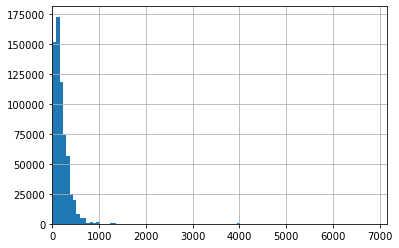

In [70]:
calender_Boston.price.hist(bins=100)
plt.xlim(0,calender_Boston.price.max())
#Most od prices are less than 1000$/night in Boston

(0.0, 1650.0)

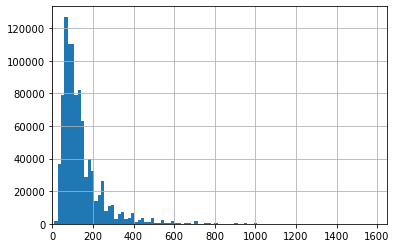

In [71]:
calender_Seattle.price.hist(bins=100)
plt.xlim(0,calender_Seattle.price.max())
#Most od prices are less than 400$/night in Seattle

In [72]:
calender_Seattle.date.dt.year.value_counts()
# In Seattle df the most present records are for 2016. However we will consider each month alone in 2016 and remove 2017 as well as it has less recrds vividly

2016    928844
2017      5698
Name: date, dtype: int64

In [73]:
calender_Boston.date.dt.year.value_counts()
# In Boston df the most present records are for 2017. However we will consider each month alone in 2016 and 2017.

2017    452406
2016    190631
Name: date, dtype: int64

In [74]:
calender_Seattle.groupby(by=calender_Seattle['date'].dt.strftime('%B')).price.count().sort_values(ascending=False)

#Seattle monthes records count

date
December     87061
March        83938
October      82438
November     81780
May          79971
September    77246
June         77244
August       76347
April        76037
July         74222
February     73321
January      64937
Name: price, dtype: int64

In [75]:
calender_Boston.groupby(by=calender_Boston['date'].dt.strftime('%B')).price.count().sort_values(ascending=False)

#Boston monthes records count

date
January      63181
December     60997
November     58888
February     56810
August       55561
March        55181
July         54963
May          53600
June         52731
April        51382
October      46345
September    33398
Name: price, dtype: int64

In [76]:
Seattle_group = calender_Seattle.groupby(by=calender_Seattle['date'].dt.strftime('%B')).price.mean().sort_values(ascending=False)
Seattle_group
# Find mean price for each month in Seattle

date
July         152.094150
August       150.656594
June         147.473137
September    143.255949
May          139.538183
December     137.251835
October      137.031939
November     135.688738
April        135.097005
March        128.644488
February     124.293927
January      122.912176
Name: price, dtype: float64

In [77]:
Boston_group = calender_Boston.groupby(by=calender_Boston['date'].dt.strftime('%B')).price.mean().sort_values(ascending=False)
Boston_group
# Find mean price for each month in Boston

date
September    237.047727
October      233.416248
August       203.330142
November     202.924416
July         202.486309
April        197.252890
June         196.535302
May          193.712295
December     192.601915
January      182.799671
March        181.818742
February     180.961028
Name: price, dtype: float64

In [78]:
calender_both = pd.DataFrame(data={'Month':Seattle_group.index, 'Seattle_price':Seattle_group.values,'Boston_price':Boston_group.values})
calender_both
# Creat dataset for each month contains the avg price/night in each month for both cities

,Month,Seattle_price,Boston_price
0,July,152.094150,237.047727
1,August,150.656594,233.416248
2,June,147.473137,203.330142
3,September,143.255949,202.924416
4,May,139.538183,202.486309
5,December,137.251835,197.252890
6,October,137.031939,196.535302
7,November,135.688738,193.712295
8,April,135.097005,192.601915
9,March,128.644488,182.799671


<Figure size 720x1080 with 0 Axes>

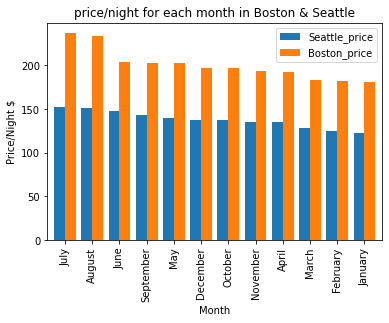

In [79]:
plt.figure(figsize=(10,15));
calender_both.plot.bar(x='Month', y= ['Seattle_price','Boston_price'], width=0.8);
plt.xticks(rotation=90);
plt.ylabel('Price/Night $');
plt.title('price/night for each month in Boston & Seattle');
# We can see that Boston prices are higher at all. Also, the summer season tend to have higher prices in both cities,
# where winter season is the lowest. This may guide us to a conclusion that both cities have the traffic peak on summer due to tourism, medication, or business.   

### Answer: How the Price/Night Change Over the Year in Both Cities?
- We could see that both cities have fluctuating prices over the year
- Prices on July, June, and Augest become higher than the rest of the year months in both cities.
- Prices start decrease from September as the summer finishes, and keep like that untill January which has the least prices
-  This may guide us to a conclusion that both cities have the traffic peak on summer due to tourism, medication, or business. 

## Q3. Predicting Property Price/Night in Seattle & Boston Using Machine Learning Model

In [402]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder,MinMaxScaler
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
# After 6 hours of continous work and many trials with the imported ML algorithms and preprocessing techniques.....

In [81]:
df_S = df_Seattle.copy()  # Create a copy of Seattle dataset named df_S  as we will concate the datasets
df_B =  df_Boston.copy() # Create a copy of Boston dataset named df_B as we will concate the datasets

In [82]:
df_S['CITY'] = 'S'
df_B['CITY'] = 'B'

In [488]:
df = pd.concat([df_S,df_B]).reset_index().drop('index',axis=1)
# Combine both datasets records and reset index


In [489]:
df.head()

,transit,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,CITY
0,NOT GIVEN,2011-08-11,within a few hours,0,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,...,10.0,10.0,9.0,10.0,f,f,moderate,f,f,S
1,GIVEN,2013-02-21,within an hour,1,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,...,10.0,10.0,10.0,10.0,f,f,strict,t,t,S
2,GIVEN,2014-06-12,within a few hours,0,t,West Queen Anne,House,Entire home/apt,11,4.5,...,10.0,10.0,10.0,10.0,f,f,strict,f,f,S
3,NOT GIVEN,2013-11-06,not given,0,t,West Queen Anne,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,f,f,flexible,f,f,S
4,GIVEN,2011-11-29,within an hour,0,t,West Queen Anne,House,Entire home/apt,6,2.0,...,10.0,10.0,9.0,9.0,f,f,strict,f,f,S


In [490]:
df.shape

(7401, 33)

In [491]:
X = df.drop('price',axis=1)
y = df['price']

In [492]:
mask = X.host_is_superhost == 0
X.loc[mask,'host_is_superhost'] = 'N'
# Make the superhost column catigorical again as we will preprocess data later in a fancy step
mask = X.host_is_superhost == 1
X.loc[mask,'host_is_superhost'] = 'Y'

In [493]:
X.info() # Just check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7401 entries, 0 to 7400
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   transit                           7401 non-null   object        
 1   host_since                        7401 non-null   datetime64[ns]
 2   host_response_time                7401 non-null   object        
 3   host_is_superhost                 7401 non-null   object        
 4   host_identity_verified            7401 non-null   object        
 5   neighbourhood_cleansed            7401 non-null   object        
 6   property_type                     7401 non-null   object        
 7   room_type                         7401 non-null   object        
 8   accommodates                      7401 non-null   int64         
 9   bathrooms                         7401 non-null   float64       
 10  bedrooms                          7401 non-null 

In [494]:
X.host_since.describe()

<ipython-input-494-d2569e498f14>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  X.host_since.describe()


count                    7401
unique                   1845
top       2015-03-30 00:00:00
freq                      142
first     2008-11-10 00:00:00
last      2016-09-06 00:00:00
Name: host_since, dtype: object

In [495]:
(2021 - (X.host_since.dt.year + X.host_since.dt.month/12 +  (X.host_since.dt.day/(12*30)))).describe()
# By calculating the since date in this way, we can get use of the column in our model (Our ref.year is 2021 as of now )

count    7401.000000
mean        6.944687
std         1.649787
min         4.233333
25%         5.661111
50%         6.600000
75%         7.975000
max        12.055556
Name: host_since, dtype: float64

In [496]:
X.host_since = (2021 - (X.host_since.dt.year + X.host_since.dt.month/12 +  (X.host_since.dt.day/(12*30))))
# By calculating the since date in this way, we can get use of the column in our model (Our ref.year is 2021 as of now )

In [497]:
numeric_features = X.select_dtypes('number').columns.to_list()
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_features = X.select_dtypes('object').columns.to_list()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append regrssion to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor',XGBRegressor(tree_method='gpu_hist', predictor = "gpu_predictor", gpu_id=0, verbosity=0))])

# Creating pipline for scalering numerical data and encode catigorical columns. The ML algorithm used is 'XGBRegressor' as it performed the best between all other imported algorithms.

In [555]:
param_grid = {
    'regressor__n_estimators': [600],
    'regressor__learning_rate': np.linspace(0,1,200),
     'regressor__max_depth': [3]
}

# param_grid = {
#     'regressor__n_estimators': [600],
#     'regressor__learning_rate': [0.05],
#      'regressor__max_depth': [3]
# }
search = GridSearchCV(pipline, param_grid, n_jobs=1, cv =5, scoring = "r2", return_train_score=True, verbose=3)

# After wide search, I kept the best parameters. If you woild like to try others, it may take long time
# I used GPU to fit the model as it takes less time

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [557]:
search.fit(X_train, y_train);

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600, score=(train=-1.615, test=-1.014), total=   3.0s
[CV] regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600, score=(train=-1.346, test=-2.065), total=   3.0s
[CV] regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV]  regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600, score=(train=-1.343, test=-2.056), total=   2.9s
[CV] regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600 
[CV]  regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600, score=(train=-1.637, test=-0.999), total=   2.9s
[CV] regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600 
[CV]  regressor__learning_rate=0.0, regressor__max_depth=3, regressor__n_estimators=600, score=(train=-1.343, test=-2.093), total=   3.0s
[CV] regressor__learning_rate=0.005025125628140704, regressor__max_depth=3, regressor__n_estimators=600 
[CV]  regressor__learning_rate=0.005025125628140704, regressor__max_depth=3, regressor__n_estimators=600, score=(train=0.480, test=0.272), total=   2.9s
[CV] regressor__learning_rate=0.005025125628140704, regressor__max_depth=3, regressor__n_estimators=600 
[CV]  regressor__learning_rate=0.00502512562814

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 49.2min finished


In [558]:
print("model score: %.2f" % search.score(X_test, y_test))
# As our dataset is small, I could achieve r^2 value as 0.55 . Clearly, our model tends to overfit but its ok with our dataset

model score: 0.55


In [559]:
search.best_params_

{'regressor__learning_rate': 0.05527638190954774,
 'regressor__max_depth': 3,
 'regressor__n_estimators': 600}

In [445]:
from sklearn import set_config

set_config(display='diagram')
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['host_since',
                                                                          'accommodates',
                                                                          'bathrooms',
                                                                          'bedrooms',
                                                                          'beds',
                                                                          'guests_included',
                                                                          'minimum_nights',
                                                                          'maximum_nights',
                                                                          'availability_365',
                                                                          'number_of_reviews',
                                                                          'review_scores_rating',
                                                                          'review_scores_accuracy',
                                                                          'review_s...
                                                     num_parallel_tree=None,
                                                     predictor='gpu_predictor',
                                                     random_state=None,
                                                     reg_alpha=None,
                                                     reg_lambda=None,
                                                     scale_pos_weight=None,
                                                     subsample=None,
                                                     tree_method='gpu_hist',
                                                     validate_parameters=None,
                                                     verbosity=0))]),
             n_jobs=1,
             param_grid={'regressor__learning_rate': [0.1],
                         'regressor__max_depth': [3],
                         'regressor__n_estimators': [1500]},
             return_train_score=True, scoring='r2', verbose=3)

### Answer: Q3. Predicting Property Price/Night in Seattle & Boston Using Machine Learning Model
- First, we imported the modules that we worked on. Note that many of them is not used as we tried all of them for hours to get the best model
- After applying the different ML algorithms and and preprocessing techniques, we could accomplish the best score (r^2) with 0.55
- XGBoostRegressor was the best algorithm as we could apply the grid search and use GPU to make finding the best params is possible (actually with CPU it took ages)
- Not only XGBoostRegressor is used, but we tried many algorithms with the grid search
- Our dataset is so small to get high score. However, achieving 0.55 r^2 seems great for our case
- The training score is much higher that test score, as our data distribution is not the same
- We might get better results if we build 2 models for each city